In [71]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt

In [72]:
DIRECTORY = r"C:\Users\me\Desktop\Kotha"
CATAGORIES = ["Art","Food","Nature","Religious","Sports","Travel"] 
print(DIRECTORY)

C:\Users\me\Desktop\Kotha


In [73]:
data = []
for catagories in CATAGORIES:
    folder = os.path.join(DIRECTORY,catagories)
    label = CATAGORIES.index(catagories)
    for img in os.listdir(folder):
        path = os.path.join(folder,img)
        
        img = cv2.imread(path)
        if img is None:
            print('Wrong path:', path)
        else:
            img_arr = cv2.resize(img, dsize=(64,64))
        
        data.append([img_arr,label])

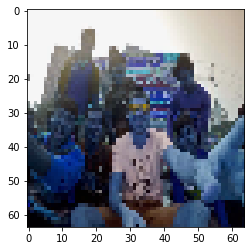

In [74]:
random.shuffle(data)
plt.imshow(img_arr)

In [75]:
x = []
y = []
for features,label in data:
    x.append(features)
    y.append(label)

In [76]:
x = np.array(x)
y = np.array(y)

In [77]:
x = x/255.0

In [78]:
input_shape = x.shape[1:]

In [79]:
import tensorflow as tf
from tensorflow import keras

In [80]:
from tensorflow.keras.models import Sequential

In [81]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation,AveragePooling2D

In [82]:
model = keras.Sequential([
   keras.layers.AveragePooling2D(6,3, input_shape=input_shape),
   keras.layers.Conv2D(64, 3, activation='relu'),
   keras.layers.Conv2D(32, 3, activation='relu'),
   keras.layers.MaxPool2D(2,2),
    
   keras.layers.Flatten(),
   keras.layers.Dense(128, activation='relu'),
   keras.layers.Dense(6, activation='softmax')
])

In [83]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


In [85]:
model.fit(x,y,validation_split=0.2,epochs=5, batch_size=32)

Epoch 1/10
27/27 [==============================] - 2s 79ms/step - loss: 0.4175 - accuracy: 0.8566 - val_loss: 0.8980 - val_accuracy: 0.6809
Epoch 2/10
27/27 [==============================] - 2s 63ms/step - loss: 0.3944 - accuracy: 0.8709 - val_loss: 0.9536 - val_accuracy: 0.6809
Epoch 3/10
27/27 [==============================] - 2s 62ms/step - loss: 0.3491 - accuracy: 0.8803 - val_loss: 0.9878 - val_accuracy: 0.6809
Epoch 4/10
27/27 [==============================] - 2s 60ms/step - loss: 0.3089 - accuracy: 0.8981 - val_loss: 1.0235 - val_accuracy: 0.7021
Epoch 5/10
27/27 [==============================] - 2s 65ms/step - loss: 0.2700 - accuracy: 0.9123 - val_loss: 0.9867 - val_accuracy: 0.7340
Epoch 6/10
27/27 [==============================] - 2s 69ms/step - loss: 0.2633 - accuracy: 0.9135 - val_loss: 0.9587 - val_accuracy: 0.6702
Epoch 7/10
27/27 [==============================] - 2s 65ms/step - loss: 0.2078 - accuracy: 0.9277 - val_loss: 1.2285 - val_accuracy: 0.6702
Epoch 8/10
27

# 

In [86]:
model.save('kothaa_saved_model/')

INFO:tensorflow:Assets written to: kothaa_saved_model/assets
